In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
import warnings
warnings.filterwarnings("ignore")
sns.set()
print('Libraries imported.')

Libraries imported.


In [3]:
!wget -O data.csv "https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv"

--2020-09-19 15:20:25--  https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv
Resolving opendata.arcgis.com (opendata.arcgis.com)... 3.221.234.207, 34.224.12.157, 52.45.166.77, ...
Connecting to opendata.arcgis.com (opendata.arcgis.com)|3.221.234.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data.csv’

data.csv                [               <=>  ]  81.03M  22.7MB/s    in 3.8s    

2020-09-19 15:20:30 (21.6 MB/s) - ‘data.csv’ saved [84970414]



In [4]:
data = pd.read_csv("data.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214050 non-null  float64
 1   Y                214050 non-null  float64
 2   OBJECTID         221525 non-null  int64  
 3   INCKEY           221525 non-null  int64  
 4   COLDETKEY        221525 non-null  int64  
 5   REPORTNO         221525 non-null  object 
 6   STATUS           221525 non-null  object 
 7   ADDRTYPE         217813 non-null  object 
 8   INTKEY           71936 non-null   float64
 9   LOCATION         216935 non-null  object 
 10  EXCEPTRSNCODE    101122 non-null  object 
 11  EXCEPTRSNDESC    11779 non-null   object 
 12  SEVERITYCODE     221524 non-null  object 
 13  SEVERITYDESC     221525 non-null  object 
 14  COLLISIONTYPE    195212 non-null  object 
 15  PERSONCOUNT      221525 non-null  int64  
 16  PEDCOUNT         221525 non-null  int6

In [5]:
map = folium.Map(location=[47.60, -122.33], zoom_start=12)
marker_cluster = MarkerCluster().add_to(map)
locations = data[['Y', 'X']][data['Y'].notna()].head(1000)
locationlist = locations.values.tolist()
for point in range(len(locations)):
    folium.Marker(locationlist[point]).add_to(marker_cluster)
map

In [6]:
data['WEATHER'].value_counts().to_frame('count')

count
Clear                     114738
Raining                    34036
Overcast                   28552
Unknown                    15131
Snowing                      919
Other                        860
Fog/Smog/Smoke               577
Sleet/Hail/Freezing Rain     116
Blowing Sand/Dirt             56
Severe Crosswind              26
Partly Cloudy                 10
Blowing Snow                   1

In [7]:
data['ROADCOND'].value_counts().to_frame('count')

count
Dry             128588
Wet              48734
Unknown          15139
Ice               1232
Snow/Slush        1014
Other              136
Standing Water     119
Sand/Mud/Dirt       77
Oil                 64

In [8]:

data['LIGHTCOND'].value_counts().to_frame('count')

count
Daylight                  119492
Dark - Street Lights On    50133
Unknown                    13532
Dusk                        6082
Dawn                        2609
Dark - No Street Lights     1579
Dark - Street Lights Off    1239
Other                        244
Dark - Unknown Lighting       23

In [9]:
data['SPEEDING'].value_counts().to_frame()

SPEEDING
Y      9929

In [10]:
data['SEVERITYCODE'].value_counts().to_frame('count')

count
1   137671
2    58783
0    21615
2b    3105
3      350

In [11]:

data['UNDERINFL'].value_counts().to_frame('count')

count
N  103927
0   81676
Y    5399
1    4230

In [12]:
data['PERSONCOUNT'].describe()

count    221525.000000
mean          2.226941
std           1.470050
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          93.000000
Name: PERSONCOUNT, dtype: float64

In [13]:

data['VEHCOUNT'].describe()

count    221525.000000
mean          1.730482
std           0.829754
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          15.000000
Name: VEHCOUNT, dtype: float64

In [14]:
data['PEDCOUNT'].describe()

count    221525.000000
mean          0.038118
std           0.201766
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [15]:
data['PEDCYLCOUNT'].describe()

count    221525.000000
mean          0.027360
std           0.164537
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

In [16]:
data.isna().sum()

X                    7475
Y                    7475
OBJECTID                0
INCKEY                  0
COLDETKEY               0
REPORTNO                0
STATUS                  0
ADDRTYPE             3712
INTKEY             149589
LOCATION             4590
EXCEPTRSNCODE      120403
EXCEPTRSNDESC      209746
SEVERITYCODE            1
SEVERITYDESC            0
COLLISIONTYPE       26313
PERSONCOUNT             0
PEDCOUNT                0
PEDCYLCOUNT             0
VEHCOUNT                0
INJURIES                0
SERIOUSINJURIES         0
FATALITIES              0
INCDATE                 0
INCDTTM                 0
JUNCTIONTYPE        11974
SDOT_COLCODE            1
SDOT_COLDESC            1
INATTENTIONIND     191337
UNDERINFL           26293
WEATHER             26503
ROADCOND            26422
LIGHTCOND           26592
PEDROWNOTGRNT      216330
SDOTCOLNUM          94320
SPEEDING           211596
ST_COLCODE           9413
ST_COLDESC          26313
SEGLANEKEY              0
CROSSWALKKEY

In [17]:
data.duplicated().sum()

0

In [18]:
data_clean = data[['X', 'Y', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
                   'SPEEDING', 'SEVERITYCODE', 'UNDERINFL',
                   'SERIOUSINJURIES', 'FATALITIES', 'INJURIES',
                   'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221525 entries, 0 to 221524
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214050 non-null  float64
 1   Y                214050 non-null  float64
 2   WEATHER          195022 non-null  object 
 3   ROADCOND         195103 non-null  object 
 4   LIGHTCOND        194933 non-null  object 
 5   SPEEDING         9929 non-null    object 
 6   SEVERITYCODE     221524 non-null  object 
 7   UNDERINFL        195232 non-null  object 
 8   SERIOUSINJURIES  221525 non-null  int64  
 9   FATALITIES       221525 non-null  int64  
 10  INJURIES         221525 non-null  int64  
 11  PERSONCOUNT      221525 non-null  int64  
 12  PEDCOUNT         221525 non-null  int64  
 13  PEDCYLCOUNT      221525 non-null  int64  
 14  VEHCOUNT         221525 non-null  int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 25.4+ MB


In [19]:
data_clean['SPEEDING'] = data_clean['SPEEDING'].map({'Y': 1})
data_clean['SPEEDING'].replace(np.nan, 0, inplace=True)
data_clean['SPEEDING'].value_counts().to_frame()

SPEEDING
0.0    211596
1.0      9929

In [20]:
data_clean.replace('Unknown', np.nan, inplace=True)
data_clean.replace('Other', np.nan, inplace=True)
data_clean['SEVERITYCODE'].replace('0', np.nan, inplace=True)

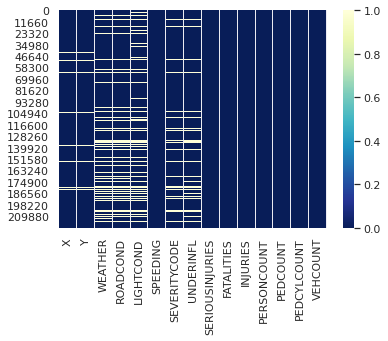

In [21]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

In [22]:

data_clean.dropna(axis=0, inplace=True)

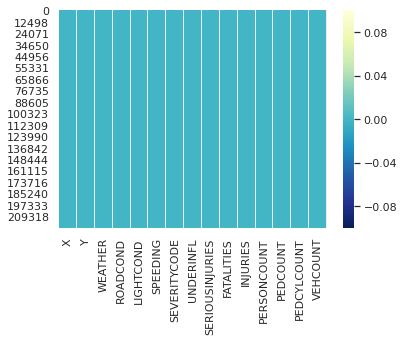

In [23]:
sns.heatmap(data_clean.isnull(), cmap='YlGnBu_r')
plt.show()

In [24]:
data_clean['UNDERINFL'] = data_clean['UNDERINFL'].map({'N': 0, '0': 0, 'Y': 1, '1': 1})

In [25]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171432 entries, 0 to 221523
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                171432 non-null  float64
 1   Y                171432 non-null  float64
 2   WEATHER          171432 non-null  object 
 3   ROADCOND         171432 non-null  object 
 4   LIGHTCOND        171432 non-null  object 
 5   SPEEDING         171432 non-null  float64
 6   SEVERITYCODE     171432 non-null  object 
 7   UNDERINFL        171432 non-null  int64  
 8   SERIOUSINJURIES  171432 non-null  int64  
 9   FATALITIES       171432 non-null  int64  
 10  INJURIES         171432 non-null  int64  
 11  PERSONCOUNT      171432 non-null  int64  
 12  PEDCOUNT         171432 non-null  int64  
 13  PEDCYLCOUNT      171432 non-null  int64  
 14  VEHCOUNT         171432 non-null  int64  
dtypes: float64(3), int64(8), object(4)
memory usage: 20.9+ MB


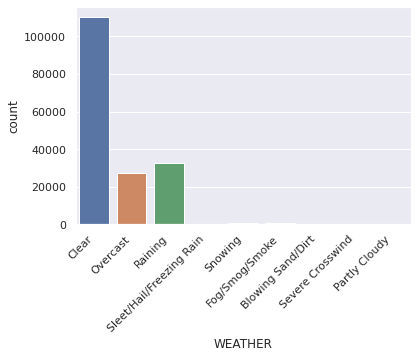

In [26]:
ax = sns.countplot(data_clean['WEATHER'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

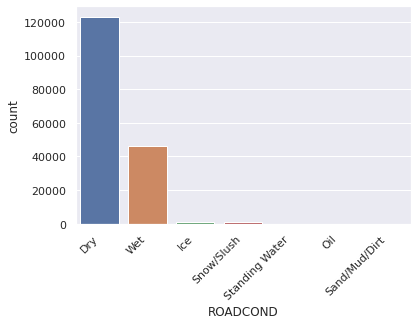

In [27]:

ax = sns.countplot(data_clean['ROADCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

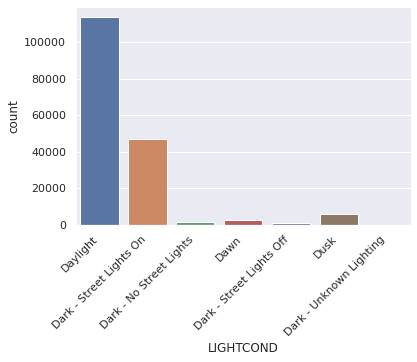

In [28]:

ax = sns.countplot(data_clean['LIGHTCOND'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, 
                   horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='UNDERINFL', ylabel='count'>

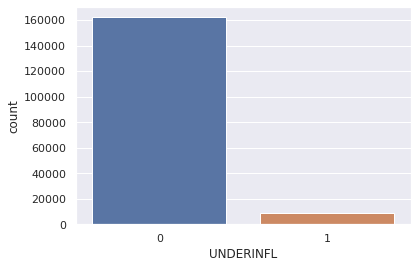

In [29]:
sns.countplot(data_clean['UNDERINFL'])

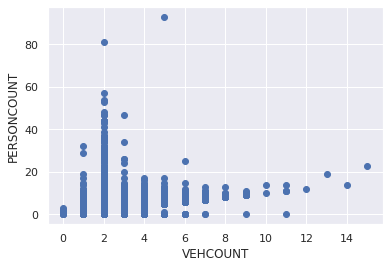

In [30]:
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['PERSONCOUNT'])
plt.xlabel('VEHCOUNT')
plt.ylabel('PERSONCOUNT')
plt.show()

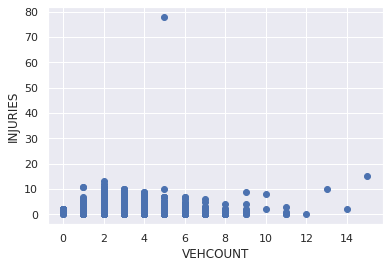

In [31]:
ax = plt.scatter(data_clean['VEHCOUNT'], data_clean['INJURIES'])
plt.xlabel('VEHCOUNT')
plt.ylabel('INJURIES')
plt.show()

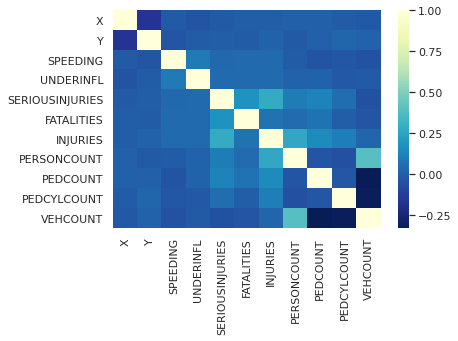

In [32]:

sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [33]:
data_clean = pd.concat([data_clean.drop(['WEATHER', 'ROADCOND', 'LIGHTCOND'], axis=1), 
           pd.get_dummies(data_clean['ROADCOND']),
           pd.get_dummies(data_clean['LIGHTCOND']),
           pd.get_dummies(data_clean['WEATHER'])], axis=1)

In [34]:
data_clean = data_clean.sample(frac=1).reset_index(drop=True)

In [35]:
data_clean.head(5).T

0        1        2        3        4
X                        -122.335 -122.337 -122.341 -122.328 -122.338
Y                         47.6246  47.6102  47.5173  47.6614  47.6153
SPEEDING                        0        0        0        0        0
SEVERITYCODE                    1        2        1        2        2
UNDERINFL                       1        0        0        0        0
SERIOUSINJURIES                 0        0        0        0        0
FATALITIES                      0        0        0        0        0
INJURIES                        0        1        0        1        1
PERSONCOUNT                     4        2        2        2        2
PEDCOUNT                        0        1        0        0        1
PEDCYLCOUNT                     0        0        0        0        0
VEHCOUNT                        2        1        2        2        1
Dry                             1        1        1        1        1
Ice                             0        0        0        0        0
Oil                             0        0        0        0        0
Sand/Mud/Dirt                   0        0        0        0        0
Snow/Slush                      0        0        0        0        0
Standing Water                  0        0        0        0        0
Wet                             0        0        0        0        0
Dark - No Street Lights         0        0        0        0        0
Dark - Street Lights Off        0        0        0        0        0
Dark - Street Lights On         1        1        0        0        1
Dark - Unknown Lighting         0        0        0        0        0
Dawn                            0        0        0        0        0
Daylight                        0        0        1        1        0
Dusk                            0        0        0        0        0
Blowing Sand/Dirt               0        0        0        0        0
Clear                           1        1        1        1        1
Fog/Smog/Smoke                  0        0        0        0        0
Overcast                        0        0        0        0        0
Partly Cloudy                   0        0        0        0        0
Raining                         0        0        0        0        0
Severe Crosswind                0        0        0        0        0
Sleet/Hail/Freezing Rain        0        0        0        0        0
Snowing                         0        0        0        0        0

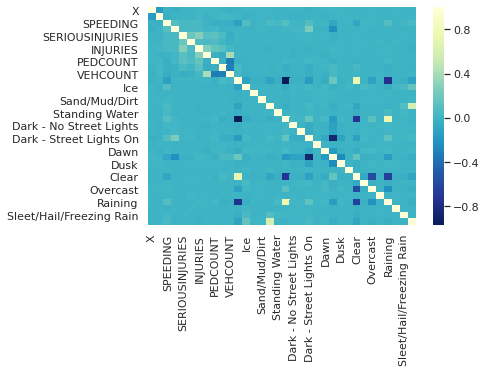

In [36]:
sns.heatmap(data_clean.corr(), cmap='YlGnBu_r')
plt.show()

In [37]:
from sklearn import preprocessing
x = data_clean.drop(['SEVERITYCODE'], axis=1)
y = data_clean[['SEVERITYCODE']]
data_clean_scaled = preprocessing.StandardScaler().fit(x).transform(x)
data_clean_scaled[0:3]

array([[-0.15681505,  0.10101589, -0.2362431 ,  4.19229773, -0.10637785,
        -0.04124352, -0.57976709,  1.04121767, -0.21020403, -0.18563301,
         0.05712785,  0.62638944, -0.07951158, -0.01690885, -0.01839677,
        -0.06975045, -0.02391615, -0.60735698, -0.08991954, -0.08072836,
         1.62254418, -0.00995864, -0.12013555, -1.40144716, -0.18552046,
        -0.01565424,  0.74491373, -0.05647337, -0.4341879 , -0.00763777,
        -0.48302678, -0.01207691, -0.0252235 , -0.06953902],
       [-0.21122851, -0.15267723, -0.2362431 , -0.23853268, -0.10637785,
        -0.04124352,  0.6889901 , -0.35954689,  4.2712905 , -0.18563301,
        -1.64491287,  0.62638944, -0.07951158, -0.01690885, -0.01839677,
        -0.06975045, -0.02391615, -0.60735698, -0.08991954, -0.08072836,
         1.62254418, -0.00995864, -0.12013555, -1.40144716, -0.18552046,
        -0.01565424,  0.74491373, -0.05647337, -0.4341879 , -0.00763777,
        -0.48302678, -0.01207691, -0.0252235 , -0.06953902],
  

In [38]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_clean_scaled, y, 
                                                    test_size=0.2, random_state=42)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dTreeModel = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dTreeModel.fit(x_train, y_train)
dTreeModel

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:

yHat = dTreeModel.predict(x_test)

In [41]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22545
           2       1.00      1.00      1.00     11065
          2b       1.00      1.00      1.00       608
           3       1.00      1.00      1.00        69

   micro avg       1.00      1.00      1.00     34287
   macro avg       1.00      1.00      1.00     34287
weighted avg       1.00      1.00      1.00     34287



In [42]:
from sklearn.ensemble import RandomForestClassifier
rfcModel = RandomForestClassifier(n_estimators=75)
rfcModel.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=75, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
yHat = rfcModel.predict(x_test)
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22545
           2       1.00      1.00      1.00     11065
          2b       1.00      1.00      1.00       608
           3       1.00      1.00      1.00        69

   micro avg       1.00      1.00      1.00     34287
   macro avg       1.00      1.00      1.00     34287
weighted avg       1.00      1.00      1.00     34287



In [45]:
from sklearn.linear_model import LogisticRegression
logRegModel = LogisticRegression(C=0.01)
logRegModel.fit(x_train, y_train)
logRegModel

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
yHat = logRegModel.predict(x_test)

In [47]:
print(classification_report(y_test, yHat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     22545
           2       1.00      1.00      1.00     11065
          2b       1.00      0.99      0.99       608
           3       1.00      0.96      0.98        69

   micro avg       1.00      1.00      1.00     34287
   macro avg       1.00      0.99      0.99     34287
weighted avg       1.00      1.00      1.00     34287



In [50]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, input_dim=x_train.shape[1], activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(4, activation='sigmoid')
])

model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [66]:

yHat = model.predict(x_test)
yPred = [np.argmax(y) for y in yHat]

In [67]:
print(classification_report(y_test.SEVERITYCODE.map({
        '1': 0,
        '2': 1,
        '2b': 2,
        '3': 3
}), yPred))

              precision    recall  f1-score   support

           0       0.67      0.64      0.65     22545
           1       0.39      0.07      0.12     11065
           2       0.00      0.00      0.00       608
           3       0.00      0.01      0.00        69

   micro avg       0.44      0.44      0.44     34287
   macro avg       0.27      0.18      0.19     34287
weighted avg       0.57      0.44      0.47     34287



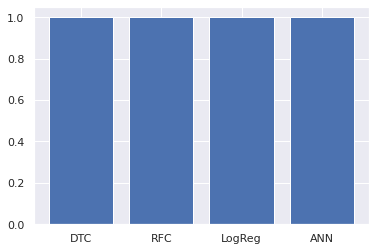

In [68]:

plt.bar(['DTC', 'RFC', 'LogReg', 'ANN'], [1.,1.,1.,1.])
plt.show()